In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Directory containing your JSON files
json_dir = "/content/drive/MyDrive/DOUTORADO/TESE/lawinstruct/english_only_data/superfiltering_test/ifd/"

In [4]:
# List all JSON files (adjust pattern if needed)
json_files = [f for f in os.listdir(json_dir) if f.endswith('.jsonl')]

In [5]:
json_files

['BVADecisions-bva_decisions_label-train-0_ifd_gpt2.jsonl',
 'CaseBriefs-case_briefs-train-0_ifd_gpt2.jsonl',
 'LawngNli-lawng_nli_entailment-train-0_ifd_gpt2.jsonl',
 'LexGLUE-ledgar-train-0_ifd_gpt2.jsonl',
 'Littleton-littleton_events-train-0_ifd_gpt2.jsonl',
 'Littleton-littleton_graph-train-0_ifd_gpt2.jsonl',
 'MultiLexSum-long_to_short-train-0_ifd_gpt2.jsonl',
 'MultiLexSum-long_to_tiny-train-0_ifd_gpt2.jsonl',
 'MultiLexSum-short_to_tiny-train-0_ifd_gpt2.jsonl',
 'NaturalInstructionsLegal-billsum_summarization-train-0_ifd_gpt2.jsonl',
 'LexGLUE-scotus-train-0_ifd_gpt2.jsonl',
 'PlainEnglishContractsSummarization-plain_english_contracts_summarization-train-0_ifd_gpt2.jsonl',
 'NaturalInstructionsLegal-casehold_legal_incorrect_answer_generation-train-0_ifd_gpt2.jsonl',
 'OLCMemos-olc_memos-train-0_ifd_gpt2.jsonl',
 'PrivacySummarization-privacy_summarization-train-0_ifd_gpt2.jsonl',
 'USClassActions-us_class_actions_win_lose-train-0_ifd_gpt2.jsonl',
 'ValidWills-valid_wills_entail

In [6]:
def load_data(filepath):
    with open(filepath, 'r') as f:
        content = f.read()
        if content.startswith('['):
            return json.loads(content)
        return [json.loads(line) for line in content.splitlines() if line.strip()]

In [54]:
filename="NaturalInstructionsLegal-casehold_legal_answer_generation-train-0_ifd_gpt2.jsonl"
filepath = os.path.join(json_dir, filename)

In [55]:
data = load_data(filepath)

In [56]:
data

Output hidden; open in https://colab.research.google.com to view.

In [57]:
df = pd.DataFrame(data)

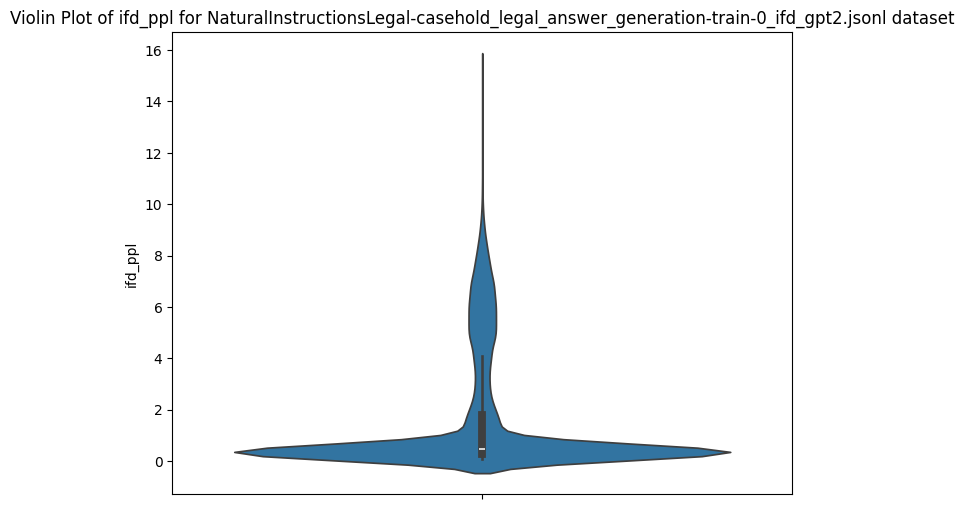

In [59]:
plt.figure(figsize=(8, 6))
sns.violinplot(y='ifd_ppl', data=df)
plt.title('Violin Plot of ifd_ppl for NaturalInstructionsLegal-casehold_legal_answer_generation-train-0_ifd_gpt2.jsonl dataset')
plt.show()

In [35]:
df

,id,instruction,input,output,ppl_A_direct,ppl_A_condition,ifd_ppl,instruction_tokens,input_tokens,output_tokens
0,1,Categorize the following statement from a priv...,"By posting Visual Content to the Site, you gra...",risky,965.132935,1800.609619,1.865660,18,287,2
1,2,Determine if the given statement from a privac...,"Alternatively, you can go to the homepage of t...",non-risky,216.519745,945.788391,4.368139,16,226,4
2,3,Does the statement from the privacy policy pre...,"Use our tools and services for good, not evil,...",non-risky,216.519745,33.639133,0.155363,18,18,4
3,4,Identify if the provided statement from a priv...,"In order to provide our service, we collect th...",non-risky,216.519745,53.960598,0.249218,18,76,4
4,5,Identify if the provided statement from a priv...,Common Provisions for MaskMe & MaskMe Mobile F...,non-risky,216.519745,25.760988,0.118978,18,51,4
...,...,...,...,...,...,...,...,...,...,...
223,224,Does the statement from the privacy policy pre...,IP addresses are never saved or processed in t...,non-risky,216.519745,26.527308,0.122517,18,12,4
224,225,Classify the following privacy policy statemen...,You can find out more about data processing here.,non-risky,216.519745,53.827415,0.248603,15,10,4
225,226,Categorize the following statement from a priv...,We review each of these service providers befo...,non-risky,216.519745,45.097614,0.208284,18,43,4
226,227,Determine if the given statement from a privac...,With some features on XING (e. g. with posts ...,non-risky,216.519745,166.492172,0.768947,16,63,4


In [36]:
risky_count = df[df['output'] == 'risky'].shape[0]
print(f"The number of rows with output = 'risky' in df is: {risky_count}")

The number of rows with output = 'risky' in df is: 33


In [37]:
mean_ifd_risky = df[df['output'] == 'risky']['ifd_ppl'].mean()
mean_ifd_non_risky = df[df['output'] == 'non-risky']['ifd_ppl'].mean()

print(f"The mean ifd_ppl when output is 'risky' is: {mean_ifd_risky}")
print(f"The mean ifd_ppl when output is 'non-risky' is: {mean_ifd_non_risky}")

The mean ifd_ppl when output is 'risky' is: 98.95970997281182
The mean ifd_ppl when output is 'non-risky' is: 0.4955387374663329


In [38]:
mean_tokens_non_risky = df[df['output'] == 'non-risky'][['input_tokens', 'instruction_tokens']].mean()
mean_tokens_risky = df[df['output'] == 'risky'][['input_tokens', 'instruction_tokens']].mean()

print("Mean token values when output is 'non-risky':")
print(mean_tokens_non_risky)
print("\nMean token values when output is 'risky':")
print(mean_tokens_risky)

Mean token values when output is 'non-risky':
input_tokens          41.697436
instruction_tokens    16.692308
dtype: float64

Mean token values when output is 'risky':
input_tokens          68.575758
instruction_tokens    17.090909
dtype: float64
